# CA01: House Price Analysis

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Source - https://stackoverflow.com/a/49189503

#Allows all columns and rows to be viewed
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [75]:
#Loading Housing Data into a dataframe from GitHub
df = pd.read_csv("house-price-train.csv")

#viewing the first 5 rows of the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Part 1: Data Understanding

In [78]:
#Checking number of rows and columns
print(df.shape)

(1460, 81)


In [80]:
#Checks Datatpes for each column
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [82]:
#Checking for missing data
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [65]:
print(df["Alley"].value_counts(dropna = False))
print('\n', df["MasVnrType"].value_counts(dropna = False))
print('\n', df["FireplaceQu"].value_counts(dropna = False))
print('\n', df["PoolQC"].value_counts(dropna = False))
print('\n', df["GarageType"].value_counts(dropna = False))
print('\n', df["Fence"].value_counts(dropna = False))
print('\n', df["MiscFeature"].value_counts(dropna = False))

Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

 MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

 FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64

 PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: count, dtype: int64

 GarageType
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

 Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

 MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64


In [84]:
# Creates a copy of the dataset and adds a 1/0 column with 1 being has a alley and 0 being does not
df1 = df.copy()
df1['HasAlley'] = df1['Alley'].notna().astype(int)

# Checks the average price difference
print(df1.groupby('HasAlley')['SalePrice'].mean())

df1['HasPool'] = df1['PoolQC'].notna().astype(int)

# Checks the average price difference
print(df1.groupby('HasPool')['SalePrice'].mean())

#Source - Gemini

HasAlley
0    183452.131483
1    142845.912088
Name: SalePrice, dtype: float64
HasPool
0    180404.663455
1    288138.571429
Name: SalePrice, dtype: float64


In [69]:
#Using the describe method to load the statistics of all continuous columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: ylabel='2ndFlrSF'>

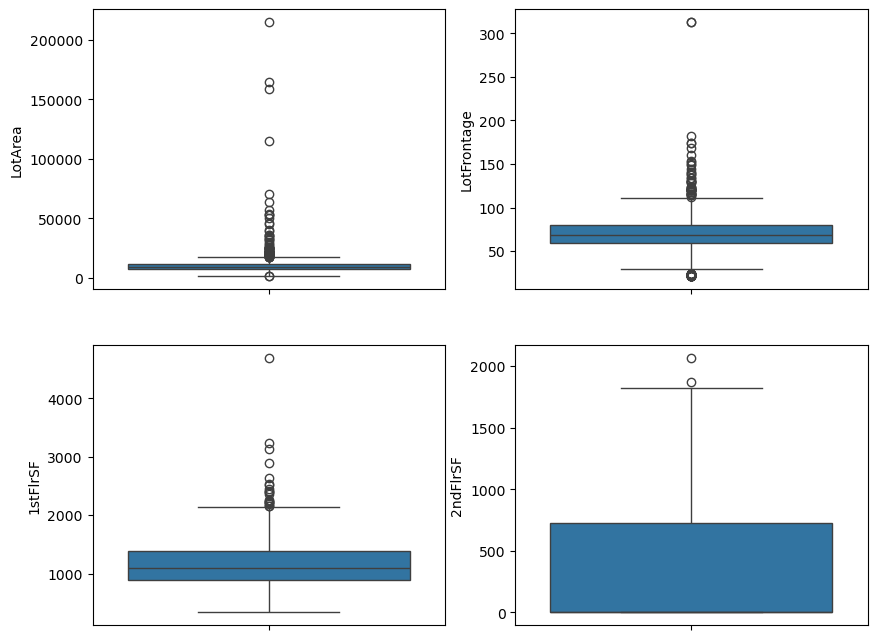

In [20]:
#checking for outliers using boxplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(df['LotArea'], ax=axes[0, 0])
sns.boxplot(df["LotFrontage"], ax=axes[0, 1])
sns.boxplot(df['1stFlrSF'], ax=axes[1, 0])
sns.boxplot(df['2ndFlrSF'], ax=axes[1, 1])

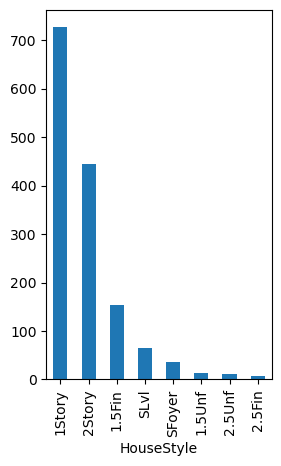

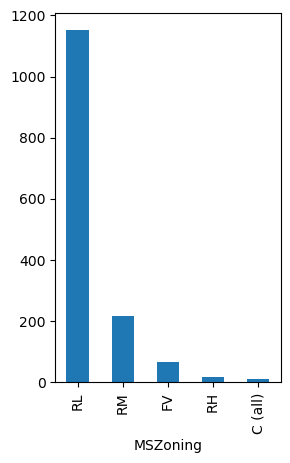

In [22]:
# Visualizing the distributions of dwelling type and zoning

plt.subplot(1, 2, 1)
df['HouseStyle'].value_counts().plot(kind='bar')
plt.show()

plt.subplot(1, 2, 2)
df['MSZoning'].value_counts().plot(kind='bar')
plt.show()

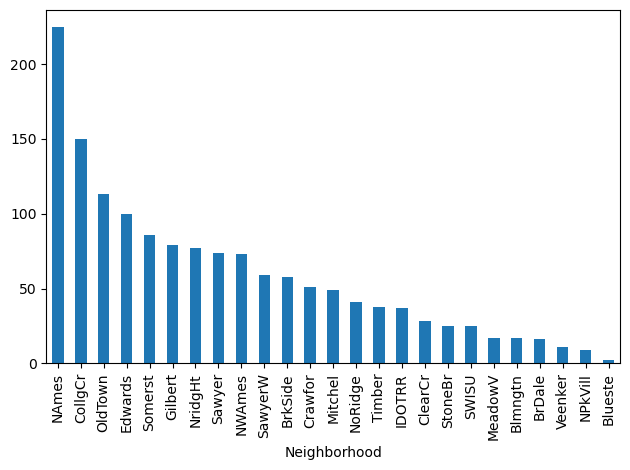

In [24]:
#Visualizing the distribution of houses within each neighborhood
df['Neighborhood'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

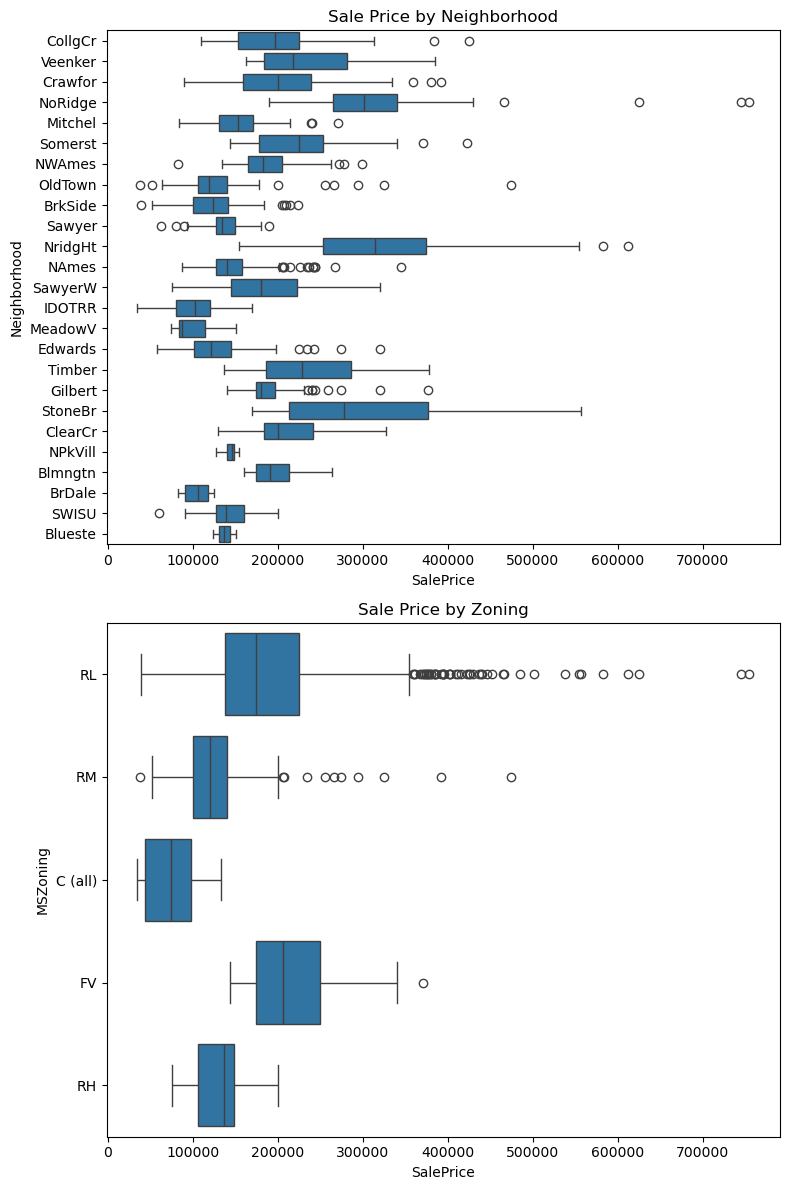

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

#Checking house prices in each neighborhood
sns.boxplot(x=df['SalePrice'], y=df["Neighborhood"], ax=axes[0])
axes[0].set_title('Sale Price by Neighborhood')

#Checking house prices in each Zone
sns.boxplot(x=df['SalePrice'], y=df["MSZoning"], ax=axes[1])
axes[1].set_title('Sale Price by Zoning')

plt.tight_layout()
plt.show()

#Source: https://seaborn.pydata.org/archive/0.12/generated/seaborn.boxplot.html

<Axes: xlabel='HouseStyle', ylabel='SalePrice'>

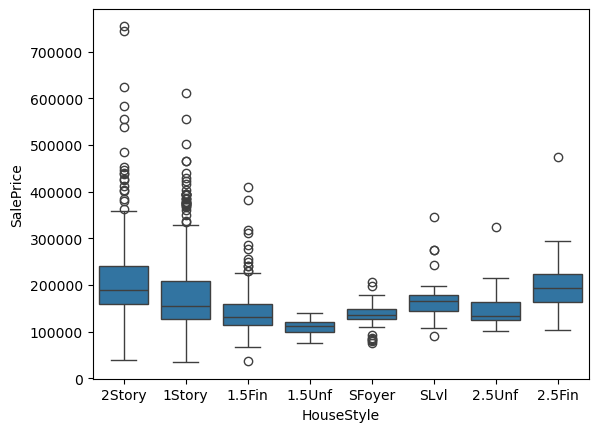

In [28]:
#Checking sale price by house style
sns.boxplot(x = df["HouseStyle"], y = df['SalePrice'])

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

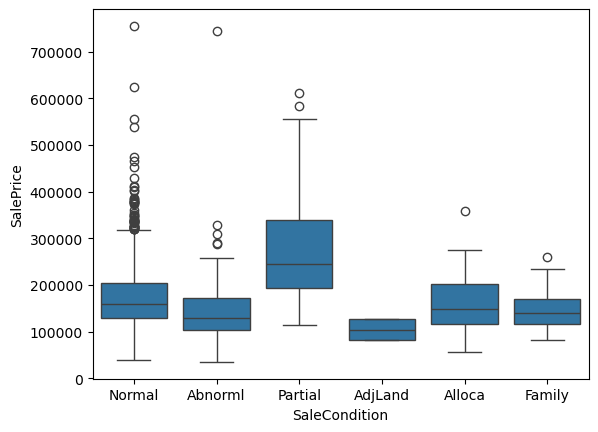

In [55]:
#Comparing sale price with sale condition
sns.boxplot(x = df["SaleCondition"], y = df['SalePrice'])

## Part 2: Preprocessing

## Part 3: Post Porcessing (Collinearity)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

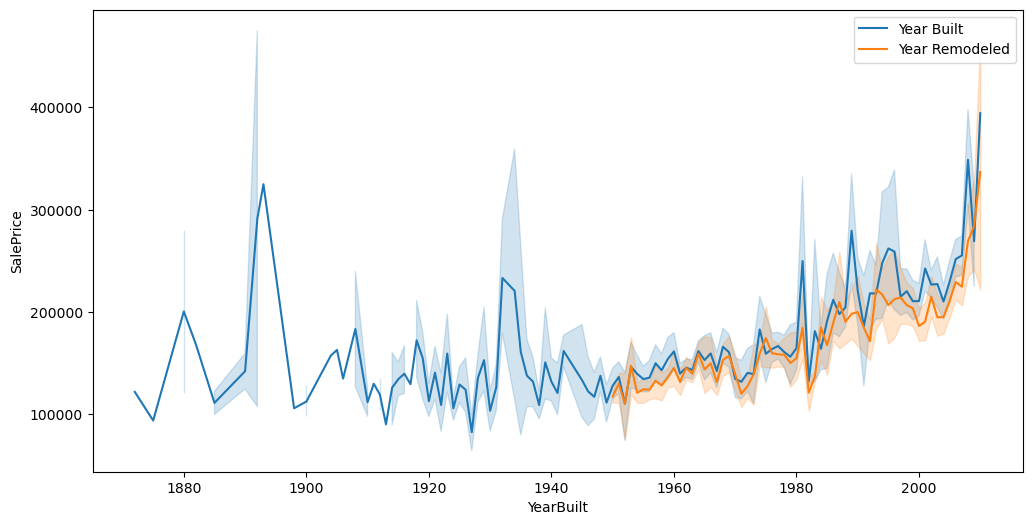

In [46]:
plt.figure(figsize=(12, 6))


#Comparing House Prices with When the house was built vs when it was remodeled
sns.lineplot(x = df["YearBuilt"], y = df["SalePrice"], label = "Year Built")
sns.lineplot(x = df["YearRemodAdd"], y = df["SalePrice"], label = "Year Remodeled")

In [44]:
#Checking Correlation between yearbuilt and year remodeled
print(df['YearBuilt'].corr(df['YearRemodAdd']))

#There is a high correlation between the two, making the two features bivariate

0.5928549763436504


In [32]:
#Checking correlation of 1st and 2nd flr square feet with above-ground level square feet
print(df['1stFlrSF'].corr(df['GrLivArea']))
print(df['2ndFlrSF'].corr(df["GrLivArea"]))
#"GrLiveArea" is the combined total of the first and second floor squarefeet, making them multivariate

0.5660239689357484
0.6875010641666035


In [34]:
#Checking correlation of GarageCars and GarageArea
print(df['GarageCars'].corr(df['GarageArea']))

#The two are bivariate since the more cars you can fit in a garage, the greater the square feet

0.8824754142814629


In [40]:
#Checking correlation with type 1 finished and unfinished basement with total basement squarefeet
print(df['BsmtFinSF1'].corr(df['TotalBsmtSF']))
print(df['BsmtUnfSF'].corr(df['TotalBsmtSF']))

#TotalBsmtSF is the combined total of BsmtFinSF1 and BsmtUnfSF making them multivariate

0.5223960519923857
0.4153596051815894
